In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import warnings
warnings.filterwarnings("ignore")

##### Lasso Regresyon:
##### • L1 düzenleme kullanarak katsayıları sıfıra yaklaştırır 
##### • L1: ortalama kare hatası + alpha*betaların mutlak değerleri toplamı
##### • En küçük alpha değeri bulunmaya çalışılır
##### • Ridge Regresyondan farkı etkisi az değişkenlerin katsayılarını sıfır yaparak modelden çıkarması

In [3]:
df = pd.read_csv("Hitters.csv")
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [4]:
df.dropna(inplace=True)

df = pd.get_dummies(df, columns=["League","Division","NewLeague"])

df.drop(["League_N", "Division_W", "NewLeague_N"], axis=1, inplace=True)

df.replace(to_replace=False, value=0, inplace=True)
df.replace(to_replace=True, value=1, inplace=True)

df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_A,Division_E,NewLeague_A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,0,0,0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,1,0,1
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,0,1,0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,0,1,0
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0,1,0,1


In [5]:
X = df.drop("Salary", axis=1)
y = df[["Salary"]]
X.shape, y.shape

((263, 19), (263, 1))

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=16)

In [17]:
lasso_model = Lasso().fit(X_train, y_train)

In [18]:
lasso_model.intercept_ # b0 sabiti

array([152.59508758])

In [19]:
lasso_model.coef_ # betalar

array([-1.79930089e+00,  8.64704880e+00,  4.02501268e+00, -6.75503076e+00,
       -1.22099929e+00,  6.90297303e+00, -1.12659649e+01, -6.65206811e-02,
       -4.72506016e-01, -1.19549473e+00,  1.91284119e+00,  1.31029415e+00,
       -1.06684720e+00,  2.08610729e-01,  3.19673016e-01, -3.62495792e+00,
       -3.20179317e+01,  1.13502648e+02,  0.00000000e+00])

In [21]:
lasso = Lasso()
coefs = []
alphas = 10**np.linspace(5,-2,100)*0.5

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

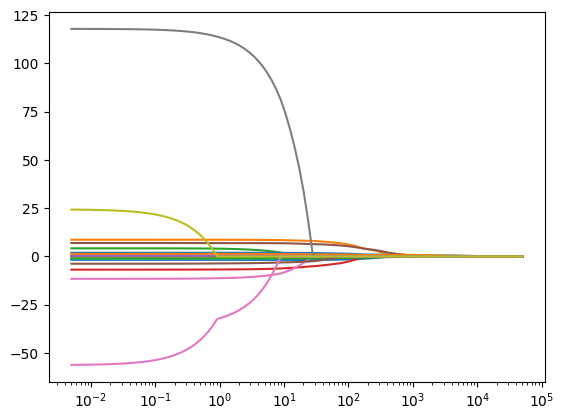

In [26]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
# lassonun katsayıları sıfıra yaklaştırmasını görselleştirdik

In [27]:
# Tahmin

In [31]:
y_pred = lasso_model.predict(X_test)

In [32]:
np.sqrt(mean_squared_error(y_test, y_pred))
# rmse

295.3749710884529

In [35]:
r2_score(y_test, y_pred) # bağımsız değişkenlerin bağımlı değişkeni açıklayabilme yüzdesi

0.6015755740124478

In [36]:
# Model Tuning (Model Doğrulama)

In [42]:
lasso_cv = LassoCV(alphas=alphas, cv=10, max_iter=100000).fit(X_train, y_train)

In [43]:
lasso_cv.alpha_

197.2103029718828

In [44]:
lasso_tuned = Lasso().set_params(alpha=lasso_cv.alpha_).fit(X_train, y_train)

In [45]:
y_pred2 = lasso_tuned.predict(X_test)

In [46]:
np.sqrt(mean_squared_error(y_test, y_pred2))
# rmse

286.4511292181019

In [47]:
r2_score(y_test, y_pred2) # bağımsız değişkenlerin bağımlı değişkeni açıklayabilme yüzdesi

0.6252862336786313

In [50]:
pd.Series(lasso_tuned.coef_, index=X_train.columns) 
# Lasso modeli önemsiz gördüğü değişkenlerin katsayılarını 0 yaparak modelden çıkardı 

AtBat         -1.094548
Hits           3.743891
HmRun         -0.000000
Runs          -0.000000
RBI           -0.000000
Walks          3.808866
Years         -0.000000
CAtBat        -0.227092
CHits          0.458103
CHmRun        -0.000000
CRuns          1.007279
CRBI           0.806689
CWalks        -0.626338
PutOuts        0.198682
Assists        0.265208
Errors        -0.000000
League_A      -0.000000
Division_E     0.000000
NewLeague_A   -0.000000
dtype: float64